# Data research

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')


<Axes: xlabel='Datetime'>

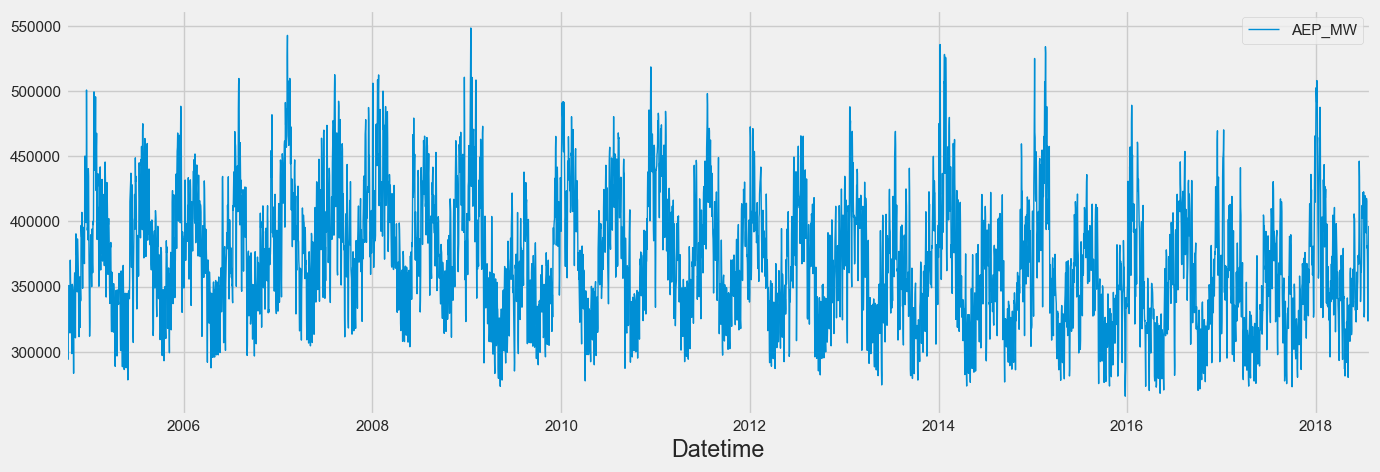

In [39]:
data = pd.read_csv('AEP_hourly.csv')
data = data.set_index('Datetime')
data = data.sort_index()
data = data[~data.index.duplicated(keep='first')]
data.index = pd.to_datetime(data.index)
data = data.resample('D').sum()[:-1]

data.plot(figsize=(15,5), linewidth=1)

Data partitioning boundaries for train, val, and test:

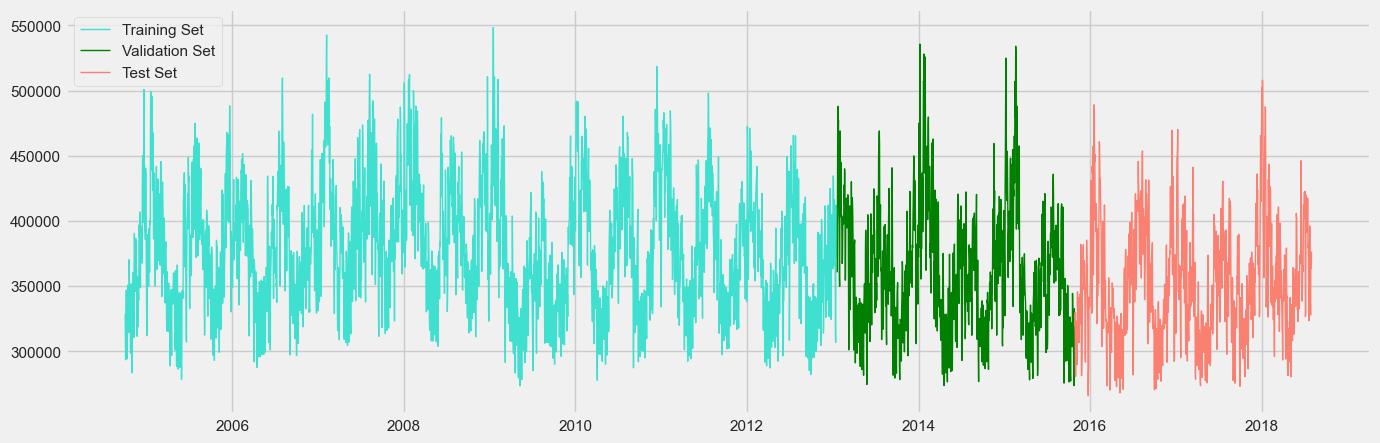

In [41]:
train = data[data.index <= '2013-01-19']
val = data[(data.index <= '2015-10-27') & (data.index > '2013-01-19')]
test = data[data.index > '2015-10-27']
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(train, color='turquoise', linewidth=1)
plt.plot(val, color='green', linewidth=1)
plt.plot(test, color='salmon', linewidth=1)
ax.legend(['Training Set', 'Validation Set', 'Test Set'])

In [42]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

data = create_features(data)

Text(0.5, 1.0, 'MW by month')

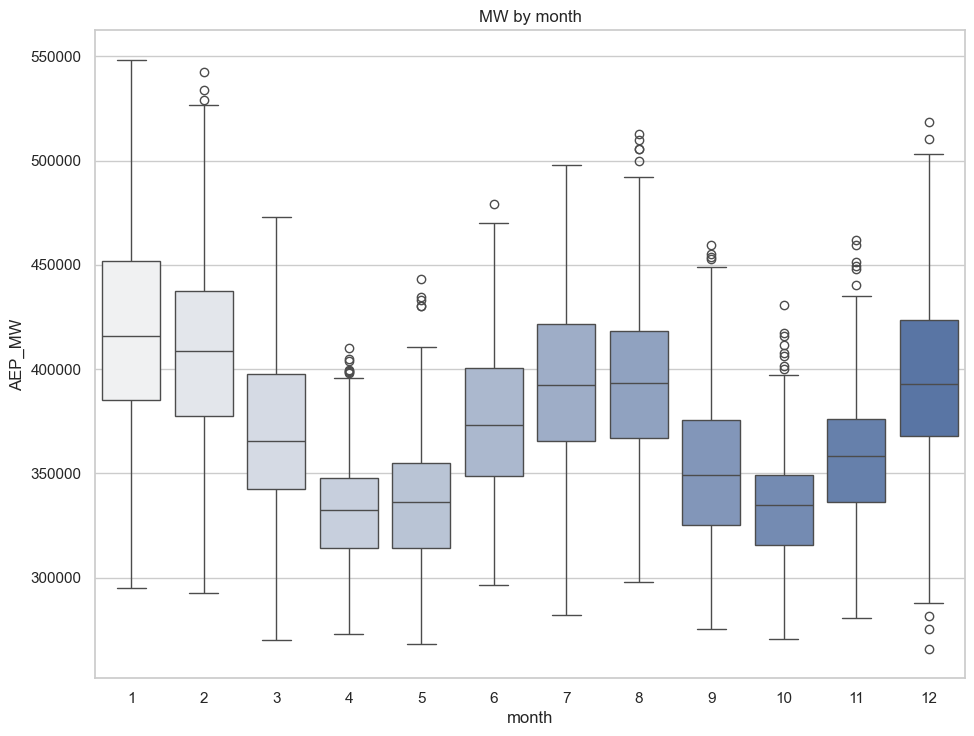

In [43]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=data, x='month', y='AEP_MW', palette='light:b')
ax.set_title('MW by month')

Text(0.5, 1.0, 'MW by week')

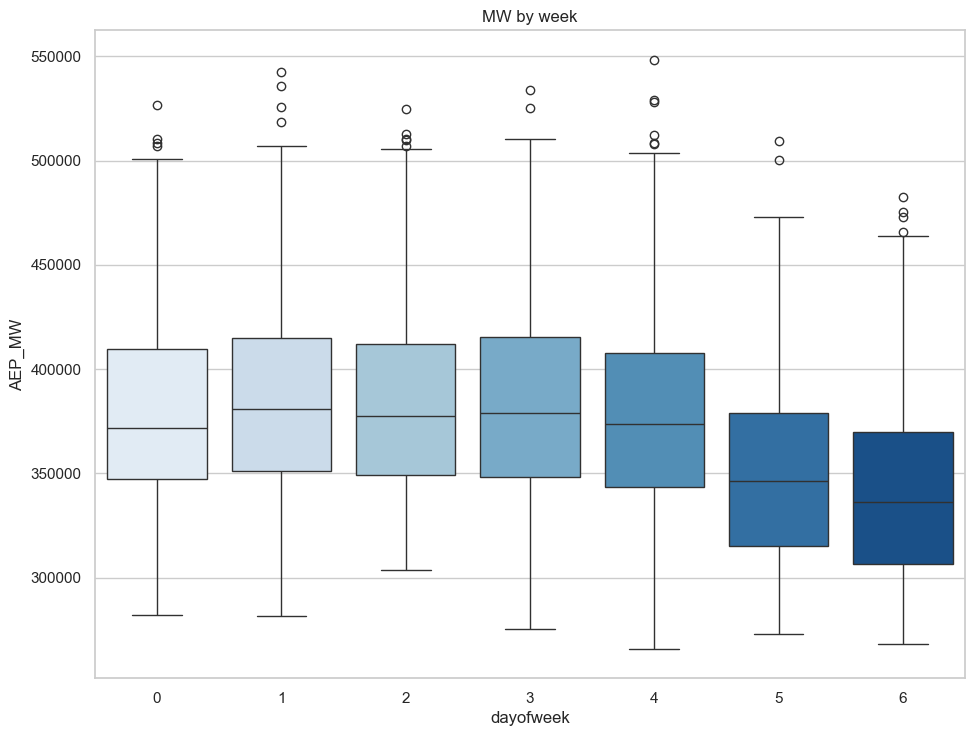

In [44]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=data, x='dayofweek', y='AEP_MW', palette='Blues')
ax.set_title('MW by week')